# 3.2 Skills/Wrangling

In this notebook, we will focus on two essential skills in data analysis:

1. The ability to add select, aggregate and transform data in a dataframe (**part 1**)
2. The ability to get insights about a dataset by means of plotting and summary statistics (**part 2**)

## Part 1

### Imports

In [4]:
import pandas as pd

### Load dataset

Let's read in a CSV file containing an export of [Elon Musk's tweets](https://twitter.com/elonmusk), exported from Twitter's API. 

In [5]:
dataset_path = '../data/musk_tweets/elonmusk_tweets.csv'
df = pd.read_csv(dataset_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
id            2819 non-null int64
created_at    2819 non-null object
text          2819 non-null object
dtypes: int64(1), object(2)
memory usage: 66.1+ KB


In [7]:
df.set_index('id', drop=True, inplace=True)

Let's give this dataset a bit more structure:
- the `id` column can be transformed into the dataframe's index, thus enabling us e.g. to select a tweet by id;
- `created_at` contains a timestamp, thus it can easily be converted into a `datetime` value
- but what's going on with the text column ??

In [8]:
df.created_at = pd.to_datetime(df.created_at)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 849636868052275200 to 15434727182
Data columns (total 2 columns):
created_at    2819 non-null datetime64[ns]
text          2819 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 66.1+ KB


### Selection

#### Renaming columns

An operation on dataframes that you'll find yourself doing very often is to rename the columns. 

The first way of renaming columns is by manipulating directly the dataframe's index via the `columns` property.

In [10]:
df.columns

Index(['created_at', 'text'], dtype='object')

We can change the column names by assigning to `columns` a list having as values the new column names.

**NB**: the size of the list and new number of colums must match!

In [11]:
# here we renamed the column `text` => `tweet`
df.columns = ['created_at', 'tweet']

In [12]:
# let's check that the change did take place
df.head()

,created_at,tweet
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


The second way of renaming colums is to use the method `rename()` of a dataframe. The `columns` parameter takes a dictionary of mappings between old and new column names.

```python
mapping_dict = {
    "old_column_name": "new_column_name"
}
```

In [13]:
# let's change column `tweet` => `text`
df = df.rename(columns={"tweet": "text"})

In [14]:
df.head()

,created_at,text
id,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


**Question**: in which cases is it more convenient to use the second method over the first?

#### Selecting columns

In [15]:
df[["created_at"]].head()

,created_at
id,
849636868052275200,2017-04-05 14:56:29
848988730585096192,2017-04-03 20:01:01
848943072423497728,2017-04-03 16:59:35
848935705057280001,2017-04-03 16:30:19
848416049573658624,2017-04-02 06:05:23


In [16]:
type(df[["created_at"]])

pandas.core.frame.DataFrame

In [17]:
# this selects one single column and returns as a Series
df["created_at"].head()

id
849636868052275200   2017-04-05 14:56:29
848988730585096192   2017-04-03 20:01:01
848943072423497728   2017-04-03 16:59:35
848935705057280001   2017-04-03 16:30:19
848416049573658624   2017-04-02 06:05:23
Name: created_at, dtype: datetime64[ns]

In [18]:
type(df["created_at"])

pandas.core.series.Series

#### Filtering rows

### Transformation



- add a column with link to original tweet
- add a column with mentions
- add a column with tweet's length (chars)

#### Add link to original tweet

In [19]:
df['tweet_link'] = df.index.map(lambda x: f'https://twitter.com/i/web/status/{x}')

In [20]:
pd.set_option("display.max_colwidth", 10000)

In [21]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

df.style.format({'tweet_link': make_clickable})

,created_at,text,tweet_link
id,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624
848415731502923777,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopter's clothing""",https://twitter.com/i/web/status/848415731502923777
848415356263702528,2017-04-02 06:02:38,"b""@verge It won't matter""",https://twitter.com/i/web/status/848415356263702528
848398971139629057,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good',https://twitter.com/i/web/status/848398971139629057
848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?""",https://twitter.com/i/web/status/848244577521647616


In [22]:
df.tail()

,created_at,text,tweet_link
id,,,
142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw',https://twitter.com/i/web/status/142881284019060736
142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'",https://twitter.com/i/web/status/142880871391838208
142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...',https://twitter.com/i/web/status/142188458125963264
142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT""",https://twitter.com/i/web/status/142179928203460608
15434727182,2010-06-04 18:31:57,"b'Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.'",https://twitter.com/i/web/status/15434727182


#### Add colums with mentions

In [23]:
import re

def find_mentions(tweet_text):
    handle_regexp = r'@[a-zA-Z0-9_]{1,15}'
    return re.findall(handle_regexp, tweet_text)

In [24]:
df['tweet_mentions'] = df.text.apply(find_mentions)

In [25]:
df['n_mentions'] = df.tweet_mentions.apply(len)

In [26]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions
id,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,[],0
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"[@waltmossberg, @mims, @defcon_5]",3
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,[],0
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"[@DaveLeeBBC, @verge]",2


#### Add column with week day

In [66]:
df.created_at.dt.weekday.head()

id
849636868052275200    2
848988730585096192    0
848943072423497728    0
848935705057280001    0
848416049573658624    6
Name: created_at, dtype: int64

In [67]:
df["week_day"] = df.created_at.dt.weekday

In [68]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day
id,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,[],0,2
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"[@waltmossberg, @mims, @defcon_5]",3,0
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,[],0,0
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"[@DaveLeeBBC, @verge]",2,6


#### Add column with day hour

In [336]:
df.created_at.dt?

In [337]:
df.created_at.dt.hour.head()

id
849636868052275200    14
848988730585096192    20
848943072423497728    16
848935705057280001    16
848416049573658624     6
Name: created_at, dtype: int64

In [69]:
df["day_hour"] = df.created_at.dt.hour

In [335]:
display_cols = ['created_at', 'week_day', 'day_hour']
df[display_cols].head(4)

,created_at,week_day,day_hour
id,,,
849636868052275200,2017-04-05 14:56:29,2,14
848988730585096192,2017-04-03 20:01:01,0,20
848943072423497728,2017-04-03 16:59:35,0,16
848935705057280001,2017-04-03 16:30:19,0,16


### Aggregation

- number of tweets by hour of the day
- number of tweets by day of the week

#### Grouping

In [73]:
df.groupby?

##### By label (column)

Previously we've added a column indicating on which day of the week a given tweet appeared.

In [81]:
grpby_result_as_series = df.groupby('day_hour')['text'].count()

In [95]:
grpby_result_as_df = df.groupby('day_hour')[['text']]\
    .count()\
    .rename({'text': 'count'}, axis='columns')

In [135]:
grpby_result_as_df.head()

,count
day_hour,
0,144
1,183
2,119
3,104
4,98


##### By series or dict

In [303]:
# here we pass the groups as a series
df.groupby(df.created_at.dt.day)[['text']].count().head()

,text
created_at,
1,107
2,107
3,114
4,97
5,117


In [300]:
df.groupby(df.created_at.dt.hour)[['text']].count().head()

,text
created_at,
0,144
1,183
2,119
3,104
4,98


##### By multiple labels (columns)

In [291]:
# here we group based on the values of two columns
# instead of one

x = df.groupby(['week_day', 'day_hour'])[['text']].count()

In [314]:
x.head()

text
week_day day_hour      
0        0           11
         1           23
         2           17
         3            7
         4           12

##### Using functions

TODO: find a good example of using a function (e.g. `len`) for grouping.

#### Sorting

To sort the values of  a dataframe we use its `sort_values` method:
- `by`: specifies the name of the column to be used for sorting
- `ascending` (default = `True`): specifies whether the sorting should be *ascending* (A-Z, 0-9) or `descending` (Z-A, 9-0) 

In [27]:
df.sort_values(by='created_at', ascending=True).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions
id,,,,,
15434727182,2010-06-04 18:31:57,"b'Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.'",https://twitter.com/i/web/status/15434727182,[],0
142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT""",https://twitter.com/i/web/status/142179928203460608,[],0
142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...',https://twitter.com/i/web/status/142188458125963264,[],0
142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'",https://twitter.com/i/web/status/142880871391838208,[],0
142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw',https://twitter.com/i/web/status/142881284019060736,[],0


In [28]:
df.sort_values(by='n_mentions', ascending=False).head()

,created_at,text,tweet_link,tweet_mentions,n_mentions
id,,,,,
752721031735812096,2016-07-12 04:27:33,"b""@kumailn @RealDaveBarton @JuddApatow @SiliconHBO @FredericLambert @MikeJudge can't wait to see the costume""",https://twitter.com/i/web/status/752721031735812096,"[@kumailn, @RealDaveBarton, @JuddApatow, @SiliconHBO, @FredericLambert, @MikeJudge]",6
303244501957365760,2013-02-17 20:48:17,b'RT @LawrenceChanin: @TeslaRoadTrip @avantgame @TEDchris @elonmusk @nytimes \nThe driving public is the winner thanks to the efforts of ...',https://twitter.com/i/web/status/303244501957365760,"[@LawrenceChanin, @TeslaRoadTrip, @avantgame, @TEDchris, @elonmusk, @nytimes]",6
845289977051148289,2017-03-24 15:03:29,b'@faultywarrior @matt_trulli @FredericLambert @TimShelton @JimPengelly Let me just go fetch my magic wand ...',https://twitter.com/i/web/status/845289977051148289,"[@faultywarrior, @matt_trulli, @FredericLambert, @TimShelton, @JimPengelly]",5
672792504895434753,2015-12-04 15:00:07,"b""RT @WSJLife: Supermodel @KarlieKloss blasts off to the future at @elonmusk's @spacex HQ https://t.co/PfE2bWcQwM @wsjmag https://t.co/zc7QM9\xe2\x80\xa6""",https://twitter.com/i/web/status/672792504895434753,"[@WSJLife, @KarlieKloss, @elonmusk, @spacex, @wsjmag]",5
191005784862236672,2012-04-14 03:31:42,b'RT @SethGreen: My love @ClareGrant & @elonmusk partied with the space cheese on our tour of @SpaceX & @TeslaMotors ...which was AWESO\xe2\x80\xa6 h ...',https://twitter.com/i/web/status/191005784862236672,"[@SethGreen, @ClareGrant, @elonmusk, @SpaceX, @TeslaMotors]",5


### Save

Before continuing with the plotting, let's save our enhanced dataframe.

## Part 2

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

#### Matplotlib

#### Histograms

They are useful to see the distribution of a certain variable in your dataset.

In [30]:
df.groupby(['n_mentions'])[['text']].count()

,text
n_mentions,
0,1145
1,1231
2,329
3,78
4,28
5,6
6,2


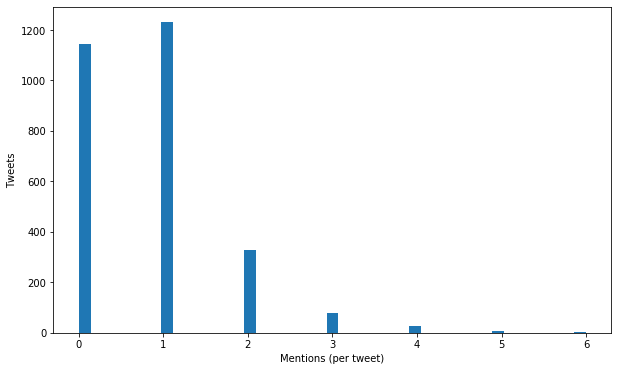

In [58]:
# TODO: start with the basic plot and improve it cell after cell

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.n_mentions, bins='auto', rwidth=1.0)
#plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Mentions (per tweet)")
plt.show()

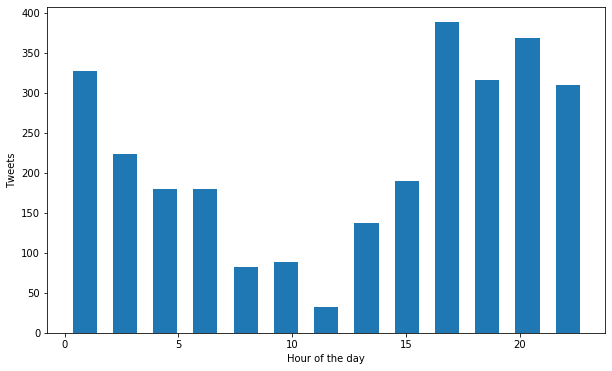

In [110]:
# TODO: start with the basic plot and improve it cell after cell

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df.day_hour, bins='auto', rwidth=0.6)
#plt.title('Distribution of the number of mentions per tweet')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

In [129]:
df_2017 = df[df.created_at.dt.year == 2017]

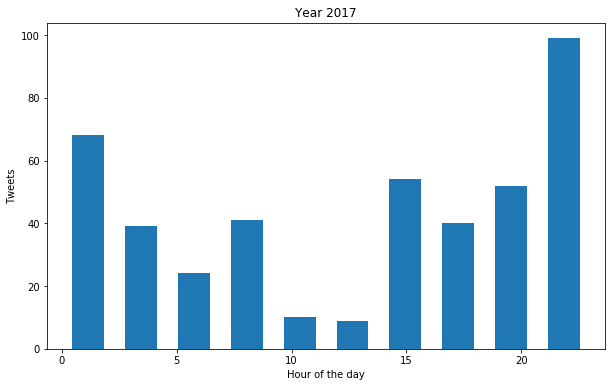

In [132]:
# TODO: start with the basic plot and improve it cell after cell

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(df_2017.day_hour, bins='auto', rwidth=0.6)
plt.title('Year 2017')
plt.ylabel("Tweets")
plt.xlabel("Hour of the day")
plt.show()

TODO: do the same histogram, but one for each year

#### Scatter plots

They are useful to plot the relation between two variables in your dataset.

In [105]:
df.head()

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,day_hour
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,[],0,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,20
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"[@waltmossberg, @mims, @defcon_5]",3,0,16
848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',https://twitter.com/i/web/status/848935705057280001,[],0,0,16
848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",https://twitter.com/i/web/status/848416049573658624,"[@DaveLeeBBC, @verge]",2,6,6


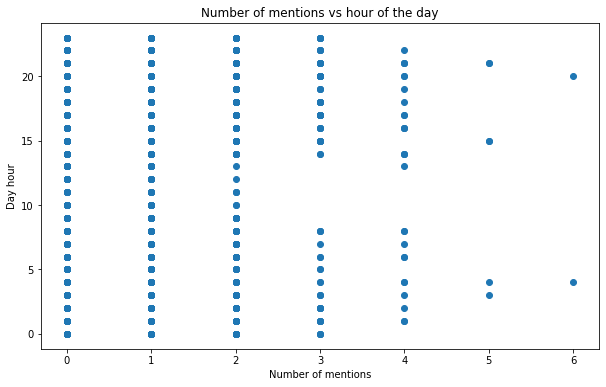

In [134]:
%matplotlib inline
plt.figure(figsize=(10, 6))

# specify the type of plot and the two
# variables to be plotted against one another
plt.scatter(df.n_mentions, df.day_hour)

# give a title to the plot
plt.title('Number of mentions vs hour of the day')

# give a label to the axes
plt.ylabel("Day hour")
plt.xlabel("Number of mentions")
plt.show()

#### Bar charts

They are useful to plot categorical data.

In [170]:
plt.bar?

In [343]:
tweets_by_weekday = df.groupby(df.created_at.dt.weekday)[['text']].count()

In [344]:
week_days = [
    "Mon",
    "Tue",
    "Wed",
    "Thur",
    "Fri",
    "Sat",
    "Sun"
]

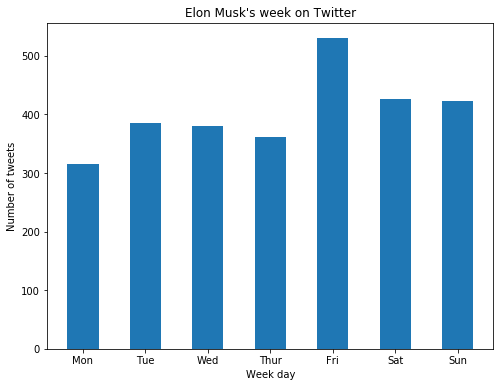

In [360]:
%matplotlib inline
plt.figure(figsize=(8, 6))

# specify the type of plot and the labels
# for the y axis (the bars)
plt.bar(
    tweets_by_weekday.index,
    tweets_by_weekday.text,
    tick_label=week_days,
    width=0.5
)

# give a title to the plot
plt.title('Elon Musk\'s week on Twitter')

# give a label to the axes
plt.ylabel("Number of tweets")
plt.xlabel("Week day")
plt.show()

#### Box plots

In [346]:
tweets_by_weekday

,text
created_at,
0,315
1,385
2,380
3,361
4,530
5,426
6,422


In [347]:
tweets_by_weekday.describe()

,text
count,7.000000
mean,402.714286
std,67.551744
min,315.000000
25%,370.500000
50%,385.000000
75%,424.000000
max,530.000000


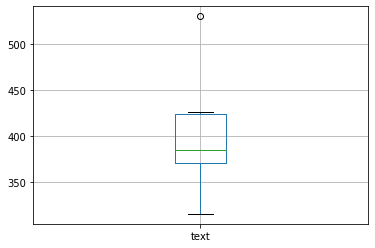

In [349]:
tweets_by_weekday.boxplot()

In [175]:
plt.bar?

In [222]:
df.head(3)

,created_at,text,tweet_link,tweet_mentions,n_mentions,week_day,day_hour
id,,,,,,,
849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',https://twitter.com/i/web/status/849636868052275200,[],0,2,14
848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""",https://twitter.com/i/web/status/848988730585096192,"[@ForIn2020, @waltmossberg, @mims, @defcon_5]",4,0,20
848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",https://twitter.com/i/web/status/848943072423497728,"[@waltmossberg, @mims, @defcon_5]",3,0,16


In [351]:
df[['day_hour']].describe()

,day_hour
count,2819.000000
mean,12.782547
std,7.611198
min,0.000000
25%,5.000000
50%,15.000000
75%,19.000000
max,23.000000


In [354]:
df[['day_hour']].quantile(.25)

day_hour    5.0
Name: 0.25, dtype: float64

<Figure size 720x432 with 0 Axes>

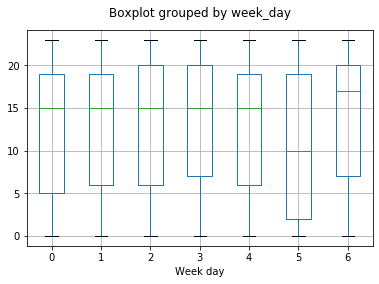

In [358]:
%matplotlib inline
plt.figure(figsize=(10, 6))

df[['day_hour', 'week_day']].boxplot(by='week_day', grid=True, fontsize=10)

# give a title to the plot
plt.title('')

# give a label to the axes
plt.xlabel("Week day")
plt.show()